In [ ]:
import numpy as np
import pandas as pd

## Data Exploration

In [2]:
data_orig = pd.read_csv('BlackFridaySHORT.csv')
data_orig.head(20)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [3]:
data_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
User_ID                       999 non-null int64
Product_ID                    999 non-null object
Gender                        999 non-null object
Age                           999 non-null object
Occupation                    999 non-null int64
City_Category                 999 non-null object
Stay_In_Current_City_Years    999 non-null object
Marital_Status                999 non-null int64
Product_Category_1            999 non-null int64
Product_Category_2            703 non-null float64
Product_Category_3            324 non-null float64
Purchase                      999 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 93.7+ KB


In [4]:
data_orig.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,9.990000e+02,999.000000,999.000000,999.000000,703.000000,324.000000,999.000000
mean,1.000091e+06,8.374374,0.508509,4.887888,9.618777,12.750000,9591.299299
std,5.199840e+01,6.592641,0.500178,3.555943,5.030935,4.037268,5115.434442
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,584.000000
25%,1.000045e+06,3.000000,0.000000,1.000000,5.000000,9.000000,5913.000000
50%,1.000092e+06,7.000000,1.000000,5.000000,8.000000,14.000000,8126.000000
75%,1.000142e+06,15.000000,1.000000,8.000000,14.000000,16.000000,13554.000000
max,1.000172e+06,20.000000,1.000000,18.000000,17.000000,18.000000,23792.000000


In [5]:
data_orig.isnull().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase                      False
dtype: bool

In [6]:
data_orig['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

## Preprocessing the Dataset

In [7]:
#One-Hot Encoding - Gender
data_orig['Male'] = (data_orig['Gender'] == 'M').astype('int')
del data_orig['Gender']
#One-Hot Encoding - Age
data_orig['Age_0-17'] = (data_orig['Age'] == '0-17').astype('int')
data_orig['Age_18-25'] = (data_orig['Age'] == '18-25').astype('int')
data_orig['Age_26-35'] = (data_orig['Age'] == '26-35').astype('int')
data_orig['Age_36-45'] = (data_orig['Age'] == '36-45').astype('int')
data_orig['Age_46-50'] = (data_orig['Age'] == '46-50').astype('int')
data_orig['Age_51-55'] = (data_orig['Age'] == '51-55').astype('int')
data_orig['Age_55+'] = (data_orig['Age'] == '55+').astype('int')
del data_orig['Age']
#One-Hot Encoding - City_Category
data_orig['City_Category - A'] = (data_orig['City_Category'] == '1').astype('int')
data_orig['City_Category - B'] = (data_orig['City_Category'] == '1').astype('int')
data_orig['City_Category - C'] = (data_orig['City_Category'] == '1').astype('int')
del data_orig['City_Category']

#try without feature engineering - one hot encoding
#corr plot
#variance covariance matrix
#Check scikit learn website feature selection or engineering

## Correlation Plot

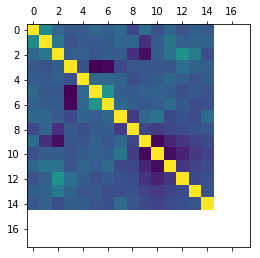

There is a negative correlation in the dataset


In [66]:
#corr plot
plt.matshow(data_orig.corr())
plt.show()
print('There is a negative correlation in the dataset')

## Variance CoVariance Matrix

In [67]:
data_orig.cov()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Male,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category - A,City_Category - B,City_Category - C
User_ID,2703.833577,91.909173,1.437656,-2.909519,1.035440,19.022504,6.419604e+03,1.683722,-1.068750,2.145360,-1.418606,1.130868,-0.837678,0.224232,-0.175426,0.0,0.0,0.0
Occupation,91.909173,43.462910,0.484787,-1.159389,-0.066653,-0.317175,2.189600e+02,0.191701,0.068413,-0.577271,0.006726,0.354835,0.049800,0.057900,0.039597,0.0,0.0,0.0
Marital_Status,1.437656,0.484787,0.250178,0.030013,0.067601,-0.070790,4.658273e+00,-0.000517,-0.021400,-0.071965,0.004115,0.023345,0.051574,0.019580,-0.005249,0.0,0.0,0.0
Product_Category_1,-2.909519,-1.159389,0.030013,12.644733,-1.293485,-9.257380,-6.950940e+03,-0.160057,-0.019330,-0.043094,-0.063008,-0.044667,0.125817,0.033120,0.011161,0.0,0.0,0.0
Product_Category_2,1.035440,-0.066653,0.067601,-1.293485,37.113813,3.054325,1.879453e+03,0.112706,-0.080449,-0.075668,0.029678,0.134515,0.033045,-0.046607,0.005485,0.0,0.0,0.0
Product_Category_3,19.022504,-0.317175,-0.070790,-9.257380,3.054325,40.934626,1.061732e+04,0.043547,0.003331,0.067216,0.092239,0.039051,-0.121595,-0.030358,-0.049884,0.0,0.0,0.0
Purchase,6419.604085,218.959982,4.658273,-6950.940359,1879.453044,10617.318231,2.616767e+07,132.526448,19.703837,-38.918888,33.945128,154.202545,-36.960135,-77.417998,-54.554489,0.0,0.0,0.0
Male,1.683722,0.191701,-0.000517,-0.160057,0.112706,0.043547,1.325264e+02,0.207065,-0.014753,0.010572,0.029438,-0.016575,-0.007648,-0.007231,0.006197,0.0,0.0,0.0
Age_0-17,-1.068750,0.068413,-0.021400,-0.019330,-0.080449,0.003331,1.970384e+01,-0.014753,0.040315,-0.009015,-0.014323,-0.008425,-0.005097,-0.002275,-0.001180,0.0,0.0,0.0
Age_18-25,2.145360,-0.577271,-0.071965,-0.043094,-0.075668,0.067216,-3.891889e+01,0.010572,-0.009015,0.168495,-0.072979,-0.042929,-0.025972,-0.011591,-0.006010,0.0,0.0,0.0


In [8]:
#Replace 4+ value in Stay_In_Current_City_Years to 4 for numeric calc
data_orig = data_orig.replace('4+','4')
data_orig.head(30)

,User_ID,Product_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Male,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category - A,City_Category - B,City_Category - C
0,1000001,P00069042,10,2,0,3,NaN,NaN,8370,0,1,0,0,0,0,0,0,0,0,0
1,1000001,P00248942,10,2,0,1,6.0,14.0,15200,0,1,0,0,0,0,0,0,0,0,0
2,1000001,P00087842,10,2,0,12,NaN,NaN,1422,0,1,0,0,0,0,0,0,0,0,0
3,1000001,P00085442,10,2,0,12,14.0,NaN,1057,0,1,0,0,0,0,0,0,0,0,0
4,1000002,P00285442,16,4,0,8,NaN,NaN,7969,1,0,0,0,0,0,0,1,0,0,0
5,1000003,P00193542,15,3,0,1,2.0,NaN,15227,1,0,0,1,0,0,0,0,0,0,0
6,1000004,P00184942,7,2,1,1,8.0,17.0,19215,1,0,0,0,0,1,0,0,0,0,0
7,1000004,P00346142,7,2,1,1,15.0,NaN,15854,1,0,0,0,0,1,0,0,0,0,0
8,1000004,P0097242,7,2,1,1,16.0,NaN,15686,1,0,0,0,0,1,0,0,0,0,0
9,1000005,P00274942,20,1,1,8,NaN,NaN,7871,1,0,0,1,0,0,0,0,0,0,0


In [9]:
data_orig

,User_ID,Product_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Male,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category - A,City_Category - B,City_Category - C
0,1000001,P00069042,10,2,0,3,NaN,NaN,8370,0,1,0,0,0,0,0,0,0,0,0
1,1000001,P00248942,10,2,0,1,6.0,14.0,15200,0,1,0,0,0,0,0,0,0,0,0
2,1000001,P00087842,10,2,0,12,NaN,NaN,1422,0,1,0,0,0,0,0,0,0,0,0
3,1000001,P00085442,10,2,0,12,14.0,NaN,1057,0,1,0,0,0,0,0,0,0,0,0
4,1000002,P00285442,16,4,0,8,NaN,NaN,7969,1,0,0,0,0,0,0,1,0,0,0
5,1000003,P00193542,15,3,0,1,2.0,NaN,15227,1,0,0,1,0,0,0,0,0,0,0
6,1000004,P00184942,7,2,1,1,8.0,17.0,19215,1,0,0,0,0,1,0,0,0,0,0
7,1000004,P00346142,7,2,1,1,15.0,NaN,15854,1,0,0,0,0,1,0,0,0,0,0
8,1000004,P0097242,7,2,1,1,16.0,NaN,15686,1,0,0,0,0,1,0,0,0,0,0
9,1000005,P00274942,20,1,1,8,NaN,NaN,7871,1,0,0,1,0,0,0,0,0,0,0


In [10]:
#Convert NaN values to 0 in 
#data_orig['Product_Category_1'] == 0
data_orig['Product_Category_1'].fillna(0, inplace = True)
data_orig['Product_Category_2'].fillna(0, inplace = True)
data_orig['Product_Category_3'].fillna(0, inplace = True)
data_orig


,User_ID,Product_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Male,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category - A,City_Category - B,City_Category - C
0,1000001,P00069042,10,2,0,3,0.0,0.0,8370,0,1,0,0,0,0,0,0,0,0,0
1,1000001,P00248942,10,2,0,1,6.0,14.0,15200,0,1,0,0,0,0,0,0,0,0,0
2,1000001,P00087842,10,2,0,12,0.0,0.0,1422,0,1,0,0,0,0,0,0,0,0,0
3,1000001,P00085442,10,2,0,12,14.0,0.0,1057,0,1,0,0,0,0,0,0,0,0,0
4,1000002,P00285442,16,4,0,8,0.0,0.0,7969,1,0,0,0,0,0,0,1,0,0,0
5,1000003,P00193542,15,3,0,1,2.0,0.0,15227,1,0,0,1,0,0,0,0,0,0,0
6,1000004,P00184942,7,2,1,1,8.0,17.0,19215,1,0,0,0,0,1,0,0,0,0,0
7,1000004,P00346142,7,2,1,1,15.0,0.0,15854,1,0,0,0,0,1,0,0,0,0,0
8,1000004,P0097242,7,2,1,1,16.0,0.0,15686,1,0,0,0,0,1,0,0,0,0,0
9,1000005,P00274942,20,1,1,8,0.0,0.0,7871,1,0,0,1,0,0,0,0,0,0,0


In [11]:
data_orig.columns

Index(['User_ID', 'Product_ID', 'Occupation', 'Stay_In_Current_City_Years',
       'Marital_Status', 'Product_Category_1', 'Product_Category_2',
       'Product_Category_3', 'Purchase', 'Male', 'Age_0-17', 'Age_18-25',
       'Age_26-35', 'Age_36-45', 'Age_46-50', 'Age_51-55', 'Age_55+',
       'City_Category - A', 'City_Category - B', 'City_Category - C'],
      dtype='object')

### Splitting the Dataset
Using TrainTestSplit

In [12]:
#X = data_orig.loc[:, data_orig.columns != 'User_ID']
X_1 = data_orig[['Male', 'Age_0-17', 'Age_18-25',
       'Age_26-35', 'Age_36-45', 'Age_46-50', 'Age_51-55', 'Age_55+',
       'City_Category - A', 'City_Category - B', 'City_Category - C', 'Occupation', 'Stay_In_Current_City_Years',
       'Marital_Status', 'Product_Category_1', 'Product_Category_2',
       'Product_Category_3']]

y_1 = data_orig['Purchase']


In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [14]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X_1, y_1, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)
X_train_org


,Male,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category - A,City_Category - B,City_Category - C,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
780,0,0,0,0,1,0,0,0,0,0,0,20,3,1,6,10.0,0.0
253,0,0,0,0,0,1,0,0,0,0,0,16,1,1,5,8.0,0.0
363,0,0,0,0,0,0,1,0,0,0,0,1,4,1,8,14.0,0.0
803,1,0,0,0,0,0,1,0,0,0,0,17,3,1,1,16.0,0.0
817,1,0,0,1,0,0,0,0,0,0,0,1,2,1,5,0.0,0.0
1,0,1,0,0,0,0,0,0,0,0,0,10,2,0,1,6.0,14.0
38,0,0,0,0,1,0,0,0,0,0,0,1,4,1,1,11.0,15.0
943,1,0,1,0,0,0,0,0,0,0,0,16,1,0,1,15.0,0.0
724,0,0,0,0,0,1,0,0,0,0,0,6,4,1,16,0.0,0.0
785,1,0,1,0,0,0,0,0,0,0,0,4,4,0,2,8.0,0.0


## Logistic Regression - Classification

In [15]:
from sklearn.linear_model import LogisticRegression
#C is regularization term
#Can use either L1 or L2 functions for penalty
c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c)
    log_l2 = LogisticRegression(penalty = 'l2', C = c)
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train_org, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))


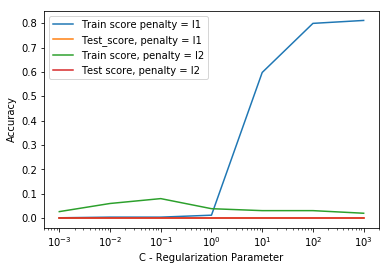

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test_score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('C - Regularization Parameter')
plt.ylabel('Accuracy')
plt.xscale('log')

In [64]:
#Running the classification with L1, C = 10, and checking results with Cross Validation
from sklearn.model_selection import cross_val_score

log_reg1 = LogisticRegression(penalty = 'l1', C = .1, n_jobs = -1)
train_score = cross_val_score(log_reg1, X_train, y_train)
test_score = cross_val_score(log_reg1, X_test, y_test, cv = 2)


C:\Users\srohi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\srohi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\srohi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\srohi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' =

In [62]:
print('The train score for Logit Regression is: ',train_score)
print('The test score for Logit Regression is: ', test_score)

The train score for Logit Regression is:  [0.00138889 0.03571429 0.        ]
The test score for Logit Regression is:  [0.00403226 0.        ]


## Support Vector Machine

In [ ]:
from sklearn.svm import LinearSVC

linSVM = LinearSVC()
linSVM.fit(X, y)
